# PIT Estimates Statewide Consolidated and Data Anlalysis

In [1]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats

In [2]:
PIT_EstHM = "../Data/2015-2019-PITEstimatesState_Clean.csv"
PIT_EstHM = pd.read_csv(PIT_EstHM)
PIT_EstHM.head(20)

,Year,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,2019.0,AK,2.0,"1,907",335,204,"1,368",761,"1,137",6,...,20,6,14,20,0.0,27,13,14,27,0.0
1,2019.0,AL,8.0,"3,261",629,199,"2,433","1,383","1,873",3,...,22,10,11,21,1.0,34,17,13,30,4.0
2,2019.0,AR,5.0,"2,717",303,317,"2,097","1,022","1,688",4,...,11,7,4,11,0.0,15,10,5,15,0.0
3,2019.0,AZ,3.0,"10,007","1,602",708,"7,697","3,683","6,297",16,...,58,17,40,57,1.0,80,26,53,79,1.0
4,2019.0,CA,44.0,"151,278","14,305","12,673","124,300","50,467","98,404","1,764",...,"1,019",457,291,748,271.0,"1,194",555,357,912,282.0
5,2019.0,CO,3.0,"9,619","1,458",685,"7,476","3,238","6,289",54,...,80,19,59,78,2.0,111,21,83,104,7.0
6,2019.0,CT,2.0,"3,033",588,272,"2,173","1,133","1,895",4,...,58,25,31,56,2.0,81,36,42,78,3.0
7,2019.0,DC,1.0,"6,521","1,606",546,"4,369","2,649","3,823",40,...,214,116,98,214,0.0,272,151,121,272,0.0
8,2019.0,DE,1.0,921,220,83,618,373,546,1,...,16,10,5,15,1.0,21,14,6,20,1.0
9,2019.0,FL,27.0,"28,328","4,703","1,625","22,000","9,884","18,357",67,...,253,140,91,231,22.0,419,228,158,386,33.0


In [3]:
# Group data by year
PIT_EstHM ["Overall Homeless"] = pd.to_numeric(PIT_EstHM["Overall Homeless"], errors='coerce')
PIT_EstHMgroup_data = PIT_EstHM.groupby("Year")["Overall Homeless"].sum()
PIT_EstHMgroup_data

Year
2019.0    4210.0
Name: Overall Homeless, dtype: float64

In [4]:
# excel file load
file_path = os.path.join("../Data/2015-2019-PITEstimatesState_Clean.xlsx")

# reading the xlsx file
df  = pd.read_excel(file_path, sheet_name=None)

# concatenate worksheets
cdf = pd.concat(df.values())

# displaying consolidated data
cdf.head(20)

,Year,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,2019,AK,2,1907,335,204,1368,761,1137,6,...,20,6,14,20,0,27,13,14,27,0
1,2019,AL,8,3261,629,199,2433,1383,1873,3,...,22,10,11,21,1,34,17,13,30,4
2,2019,AR,5,2717,303,317,2097,1022,1688,4,...,11,7,4,11,0,15,10,5,15,0
3,2019,AZ,3,10007,1602,708,7697,3683,6297,16,...,58,17,40,57,1,80,26,53,79,1
4,2019,CA,44,151278,14305,12673,124300,50467,98404,1764,...,1019,457,291,748,271,1194,555,357,912,282
5,2019,CO,3,9619,1458,685,7476,3238,6289,54,...,80,19,59,78,2,111,21,83,104,7
6,2019,CT,2,3033,588,272,2173,1133,1895,4,...,58,25,31,56,2,81,36,42,78,3
7,2019,DC,1,6521,1606,546,4369,2649,3823,40,...,214,116,98,214,0,272,151,121,272,0
8,2019,DE,1,921,220,83,618,373,546,1,...,16,10,5,15,1,21,14,6,20,1
9,2019,FL,27,28328,4703,1625,22000,9884,18357,67,...,253,140,91,231,22,419,228,158,386,33


In [5]:
# grouping data for check
cdf["Overall Homeless"] = pd.to_numeric(cdf["Overall Homeless"], errors='coerce')
cdfgroup_data = cdf.groupby("Year")["Overall Homeless"].sum()
cdfgroup_data

Year
2015    1129416.0
2016    1099856.0
2017    1101992.0
2018    1105660.0
2019    1135430.0
Name: Overall Homeless, dtype: float64

In [6]:
cdf.dropna(axis=1, how='any')
cdf.count()

Year                                                    280
State                                                   280
Number of CoCs                                          280
Overall Homeless                                        278
Overall Homeless - Under 18                             280
                                                       ... 
Overall Homeless Children of Parenting Youth            280
Sheltered ES Homeless Children of Parenting Youth       280
Sheltered TH Homeless Children of Parenting Youth       280
Sheltered Total Homeless Children of Parenting Youth    280
Unsheltered Homeless Children of Parenting Youth        280
Length: 542, dtype: int64

In [7]:
# check interested column count before output file
cdf = cdf[['Year', 'State', 'Overall Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless',
           'Overall Homeless Individuals','Sheltered Total Homeless Individuals', 'Unsheltered Homeless Individuals', 
           'Overall Homeless People in Families', 'Sheltered Total Homeless People in Families', 'Unsheltered Homeless People in Families',
            'Overall Homeless Family Households', 'Sheltered Total Homeless Family Households', 'Unsheltered Homeless Family Households','Overall Chronically Homeless', 'Sheltered Total Chronically Homeless',	
            'Unsheltered Chronically Homeless',	'Overall Chronically Homeless Individuals', 'Sheltered Total Chronically Homeless Individuals', 'Unsheltered Chronically Homeless Individuals',	'Overall Chronically Homeless People in Families',
           'Sheltered Total Chronically Homeless People in Families','Unsheltered Chronically Homeless People in Families','Overall Homeless Veterans', 'Sheltered Total Homeless Veterans','Unsheltered Homeless Veterans']]

cdf = cdf.set_index(['Year'])
cdf.count()

State                                                      280
Overall Homeless                                           278
Sheltered Total Homeless                                   280
Unsheltered Homeless                                       280
Overall Homeless Individuals                               280
Sheltered Total Homeless Individuals                       280
Unsheltered Homeless Individuals                           280
Overall Homeless People in Families                        280
Sheltered Total Homeless People in Families                280
Unsheltered Homeless People in Families                    280
Overall Homeless Family Households                         280
Sheltered Total Homeless Family Households                 280
Unsheltered Homeless Family Households                     280
Overall Chronically Homeless                               280
Sheltered Total Chronically Homeless                       280
Unsheltered Chronically Homeless                       

In [8]:
# consolidated data exported to csv
#cdf.to_csv("../Data/PIT_AllYearsData_Output.csv")

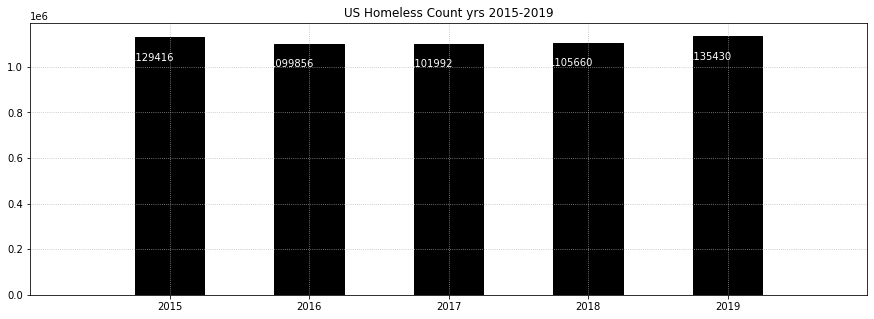

In [9]:
fig = plt.figure(figsize=(15,5))
x = cdfgroup_data.index
y = cdfgroup_data
bar_width = 0.50
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="black", ec=edgecolor, lw=1)

# Set Graph Properties
plt.title('US Homeless Count yrs 2015-2019') 
plt.grid(True,linestyle=':', alpha=0.90)
plt.xlim(2014, x.max()+1)
plt.xticks(x, cdfgroup_data.index)

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x()+ bar.get_width()/4., 0.9*height,'%s' % (str(int(height))), ha='center', va='bottom', color="white")
plt.savefig("../Images/USHomlessCountBoxPlot.png")
plt.show()

In [10]:
# Read Output Consolidated file
PIT_EstHM_All = "../Data/PIT_AllYearsData_Output.csv"
PIT_EstHM_All = pd.read_csv(PIT_EstHM_All)
PIT_EstHM_All.head(20)

,Year,State,Overall Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered Total Homeless Individuals,Unsheltered Homeless Individuals,Overall Homeless People in Families,Sheltered Total Homeless People in Families,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Unsheltered Homeless Veterans
0,2019,AK,1907.0,1634,273,1384,1118,266,523,516,...,99,231,134,97,38,36,2,111,85,26
1,2019,AL,3261.0,2070,1191,2519,1429,1090,742,641,...,139,350,221,129,19,9,10,292,223,69
2,2019,AR,2717.0,1302,1415,2303,972,1331,414,330,...,453,676,223,453,15,15,0,238,153,85
3,2019,AZ,10007.0,5475,4532,7538,3099,4439,2469,2376,...,1210,1766,599,1167,110,67,43,910,598,312
4,2019,CA,151278.0,42846,108432,128777,25323,103454,22501,17523,...,33670,39275,6483,32792,2282,1404,878,10980,3261,7719
5,2019,CO,9619.0,7431,2188,7263,5228,2035,2356,2203,...,918,2106,1211,895,81,58,23,1068,792,276
6,2019,CT,3033.0,2577,456,2100,1648,452,933,929,...,73,202,129,73,12,12,0,195,182,13
7,2019,DC,6521.0,5913,608,3875,3267,608,2646,2646,...,311,1374,1063,311,314,314,0,297,262,35
8,2019,DE,921.0,826,95,565,489,76,356,337,...,37,119,86,33,49,45,4,65,61,4
9,2019,FL,28328.0,15852,12476,21265,9953,11312,7063,5899,...,3888,5181,1456,3725,548,385,163,2472,1576,896


In [11]:
PIT_EstHM_All[['State', 'Year']].nunique()

State    56
Year      5
dtype: int64

In [12]:
PIT_EstHM_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Year                                                     280 non-null    int64  
 1   State                                                    280 non-null    object 
 2   Overall Homeless                                         278 non-null    float64
 3   Sheltered Total Homeless                                 280 non-null    object 
 4   Unsheltered Homeless                                     280 non-null    object 
 5   Overall Homeless Individuals                             280 non-null    object 
 6   Sheltered Total Homeless Individuals                     280 non-null    object 
 7   Unsheltered Homeless Individuals                         280 non-null    object 
 8   Overall Homeless People in Fam

In [13]:
PIT_EstHM_All['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY',
       'Total'], dtype=object)

In [14]:
# Read the change in year
PITEstHM_Change = PIT_EstHM_All[PIT_EstHM_All["Year"].isin([2015, 2016, 2017, 2018, 2019])]
PITEstHM_Change_group = PITEstHM_Change.groupby(["Year","State"])["Overall Homeless"].sum()
PITEstHM_Change = pd.DataFrame(PITEstHM_Change_group)
PITEstHM_Change = PITEstHM_Change.reset_index()
PITEstHM_Change = PITEstHM_Change.pivot(index='State', columns='Year', values='Overall Homeless')
PITEstHM_Change.head(20)

Year,2015,2016,2017,2018,2019
State,,,,,
AK,1956.0,1940.0,1845.0,2016.0,1907.0
AL,3970.0,4111.0,3793.0,3434.0,3261.0
AR,2560.0,2463.0,2467.0,2712.0,2717.0
AZ,9896.0,9707.0,8947.0,9865.0,10007.0
CA,115738.0,118142.0,131532.0,129972.0,151278.0
CO,9953.0,10550.0,10940.0,10857.0,9619.0
CT,4047.0,3902.0,3388.0,3976.0,3033.0
DC,7298.0,8350.0,7473.0,6904.0,6521.0
DE,953.0,1070.0,994.0,1082.0,921.0


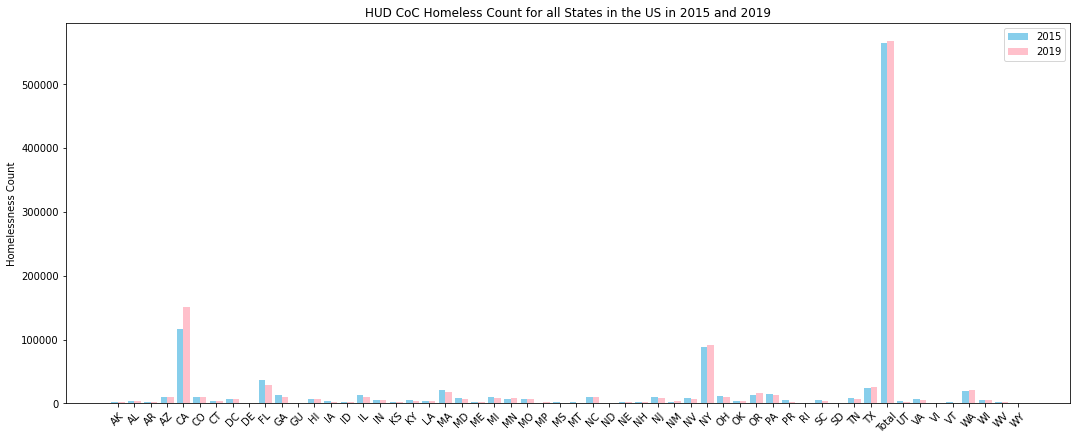

In [15]:
# Homelessness Change Summary
ind = np.arange(len(PITEstHM_Change[2015]))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(ind - width/2, PITEstHM_Change[2015], width, color='SkyBlue', label='2015')
rects2 = ax.bar(ind + width/2, PITEstHM_Change[2019], width, color='Pink', label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Homelessness Count')
ax.set_title('HUD CoC Homeless Count for all States in the US in 2015 and 2019')
ax.set_xticks(ind)
ax.set_xticklabels((PITEstHM_Change.index),rotation=45)
ax.legend()
plt.savefig("../Images/HMChange_Summary.png")
plt.show()